In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os



In [2]:
train_segments = [0, 1, 2, 4, 5, 6, 7, 8, 9]
path = os.path.join("data", "train_segments", "train_segment_") ###################### I/O

train_df =  pd.read_csv(f"{path}{train_segments[0]}.csv") 


In [3]:

for col in train_df:
    if "sin" in col:
        print(col)
    if "cos" in col:
        print(col)
    
# train_df['']

search day sin
search day cos
arrival day sin
arrival day cos
end day sin
end day cos


In [4]:
search_day_days = train_df[["search day sin", "search day cos"]]

In [5]:
search_day_days.head()

,search day sin,search day cos
0,-0.336637,0.941634
1,-0.336637,0.941634
2,-0.336637,0.941634
3,-0.336637,0.941634
4,-0.336637,0.941634


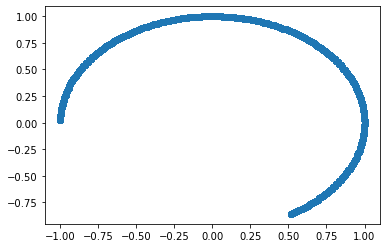

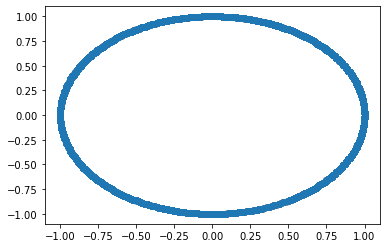

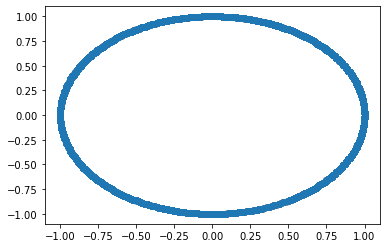

In [6]:
plt.scatter(train_df["search day cos"].values.tolist(), train_df["search day sin"].values.tolist(), alpha=0.01)
plt.show()
plt.scatter(train_df["arrival day cos"].values.tolist(), train_df["arrival day sin"].values.tolist(), alpha=0.01)
plt.show()
plt.scatter(train_df["end day cos"].values.tolist(), train_df["end day sin"].values.tolist(), alpha=0.01)
plt.show()

(array([11912., 12503., 10896.,  9302., 11852., 11439.,  8883., 10132.,
        10560., 12794., 12087., 15981., 13713., 10537., 14079., 15834.,
        14191., 15150., 17662., 14195., 16651., 15270., 15113., 13125.,
        14853., 14512., 12381., 15395., 13930., 13756., 15761., 16116.,
        13988., 16846., 18539., 18498.]),
 array([-59.01639344, -52.41814507, -45.8198967 , -39.22164833,
        -32.62339996, -26.02515158, -19.42690321, -12.82865484,
         -6.23040647,   0.3678419 ,   6.96609028,  13.56433865,
         20.16258702,  26.76083539,  33.35908376,  39.95733214,
         46.55558051,  53.15382888,  59.75207725,  66.35032562,
         72.948574  ,  79.54682237,  86.14507074,  92.74331911,
         99.34156748, 105.93981585, 112.53806423, 119.1363126 ,
        125.73456097, 132.33280934, 138.93105771, 145.52930609,
        152.12755446, 158.72580283, 165.3240512 , 171.92229957,
        178.52054795]),
 <a list of 36 Patch objects>)

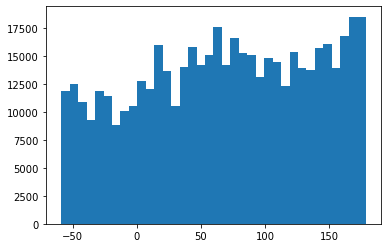

In [7]:
plt.hist(np.arctan2(train_df["search day sin"], train_df["search day cos"]) * 180 / np.pi , bins=36)


In [8]:
# plt.hist(np.arctan2(train_df["arrival day sin"], train_df["arrival day cos"]) * 180 / np.pi , bins=36, density=True)

df1 = pd.DataFrame((np.arctan2(train_df["arrival day sin"], train_df["arrival day cos"]) * 180 / np.pi).value_counts(bins=36))

# plt.hist(df1)
# print(df1.columns)

In [9]:
df1 = pd.DataFrame((np.arctan2(train_df["arrival day sin"], train_df["arrival day cos"]) * 180 / np.pi).value_counts(bins=36))

total_count_ = df1.sum()
angles = [angle for angle in (np.arctan2(train_df["arrival day sin"], train_df["arrival day cos"]) * 180 / np.pi).tolist()]
magnitudes = [0]*len(angles)
for i, angle in enumerate(angles):
    for ind, interval in enumerate(df1.index):
        if angle in interval:
            intervals.contains(0.5)
            magnitudes[i] = df1.loc[ind]/total_count_
train_df['window shopping level'] = magnitudes
print(magnitudes[:200])
# plt.plot(ordered_coss * ordered_densities, ordered_sins * ordered_densities)
# plt.xlim(-0.07, 0.07)
# plt.ylim(-0.07, 0.07)

[0    0.02743
dtype: float64, 0    0.02743
dtype: float64, 0    0.02743
dtype: float64, 0    0.02743
dtype: float64, 0    0.02743
dtype: float64, 0    0.02743
dtype: float64, 0    0.02743
dtype: float64, 0    0.02743
dtype: float64, 0    0.02743
dtype: float64, 0    0.02743
dtype: float64, 0    0.02743
dtype: float64, 0    0.02743
dtype: float64, 0    0.02743
dtype: float64, 0    0.02743
dtype: float64, 0    0.02743
dtype: float64, 0    0.02743
dtype: float64, 0    0.02743
dtype: float64, 0    0.02743
dtype: float64, 0    0.02743
dtype: float64, 0    0.02743
dtype: float64, 0    0.02743
dtype: float64, 0    0.02743
dtype: float64, 0    0.02743
dtype: float64, 0    0.02743
dtype: float64, 0    0.02743
dtype: float64, 0    0.02743
dtype: float64, 0    0.02743
dtype: float64, 0    0.02743
dtype: float64, 0    0.02743
dtype: float64, 0    0.02743
dtype: float64, 0    0.02743
dtype: float64, 0    0.02743
dtype: float64, 0    0.02743
dtype: float64, 0    0.024374
dtype: float64, 0    0.02437

(array([19964., 12494., 10035., 10022.,  6027.,  5204.,  3633.,  4314.,
         2707.,  2298.,  1867.,  1339.,  6791.,  9589., 11948., 10454.,
        14569., 20468., 12149., 13672., 11435., 15254., 17635., 16453.,
        18228., 21245., 25145., 16739., 20140., 17887., 20282., 19635.,
        26312., 21558., 24940., 26004.]),
 array([-179.50684932, -169.52054795, -159.53424658, -149.54794521,
        -139.56164384, -129.57534247, -119.5890411 , -109.60273973,
         -99.61643836,  -89.63013699,  -79.64383562,  -69.65753425,
         -59.67123288,  -49.68493151,  -39.69863014,  -29.71232877,
         -19.7260274 ,   -9.73972603,    0.24657534,   10.23287671,
          20.21917808,   30.20547945,   40.19178082,   50.17808219,
          60.16438356,   70.15068493,   80.1369863 ,   90.12328767,
         100.10958904,  110.09589041,  120.08219178,  130.06849315,
         140.05479452,  150.04109589,  160.02739726,  170.01369863,
         180.        ]),
 <a list of 36 Patch objects>)

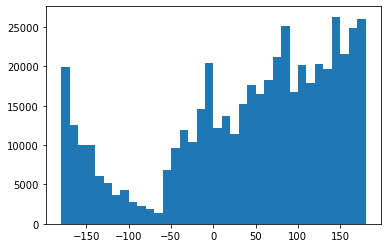

In [10]:
plt.hist(np.arctan2(train_df["end day sin"], train_df["end day cos"]) * 180 / np.pi, bins=36)


Float64Index([            145.048,             175.007,               85.13,
                         165.0205,             155.034,              75.144,
                          -4.7465,             125.075,  105.10300000000001,
              -174.69400000000002,  135.06150000000002,             65.1575,
                          115.089,              45.185,             95.1165,
                           55.171,  35.198499999999996,             -14.733,
                           15.226, -164.52749999999997,                5.24,
                         -34.7055,              25.212,             -24.719,
                         -154.541,            -144.555,             -44.692,
                          -54.678,           -134.5685,            -124.582,
                        -104.6095,            -114.596,  -94.62299999999999,
                          -84.637,  -74.65100000000001,            -64.6645],
             dtype='float64')
(140.055, 150.041]                 26312
(170

(-0.07, 0.07)

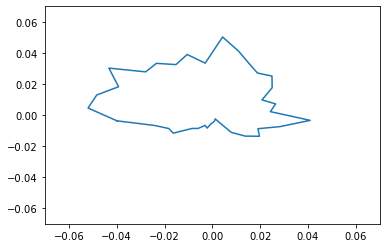

In [11]:
df1 = pd.DataFrame((np.arctan2(train_df["end day sin"], train_df["end day cos"]) * 180 / np.pi).value_counts(bins=36))
df1.index.unique()
print(df1.index.mid)
print(df1[0])
print(df1.columns)
print("cols")
rads = np.radians(df1.index.unique().mid.tolist())
sins = np.sin(rads).tolist()
coss = np.cos(rads).tolist()
density = (df1[0]/df1[0].sum()).tolist()

collected = [[rads[i], sins[i], coss[i], density[i]] for i, e in enumerate(rads)]
collected = sorted(collected, key = lambda x:x[0])
collected.append(collected[0])

print([e[0] for e in collected])
ordered_sins = np.array([e[1] for e in collected])
ordered_coss = np.array([e[2] for e in collected])
ordered_densities = np.array([e[3] for e in collected])

print(density)
# print(np.radians(df1.index.unique()[0].mid))
# print(np.degrees(np.radians(df1.index.unique()[0].mid)))
plt.plot(ordered_coss * ordered_densities, ordered_sins * ordered_densities)
plt.xlim(-0.07, 0.07)
plt.ylim(-0.07, 0.07)

In [12]:
magnitudes[9000:10000]

[0    0.024374
 dtype: float64,
 0    0.024374
 dtype: float64,
 0    0.024374
 dtype: float64,
 0    0.024374
 dtype: float64,
 0    0.024374
 dtype: float64,
 0    0.024374
 dtype: float64,
 0    0.024374
 dtype: float64,
 0    0.024374
 dtype: float64,
 0    0.024374
 dtype: float64,
 0    0.024374
 dtype: float64,
 0    0.024374
 dtype: float64,
 0    0.024374
 dtype: float64,
 0    0.024374
 dtype: float64,
 0    0.024374
 dtype: float64,
 0    0.024374
 dtype: float64,
 0    0.024374
 dtype: float64,
 0    0.024374
 dtype: float64,
 0    0.024374
 dtype: float64,
 0    0.024374
 dtype: float64,
 0    0.024374
 dtype: float64,
 0    0.024374
 dtype: float64,
 0    0.024374
 dtype: float64,
 0    0.024374
 dtype: float64,
 0    0.024374
 dtype: float64,
 0    0.024374
 dtype: float64,
 0    0.024374
 dtype: float64,
 0    0.024374
 dtype: float64,
 0    0.024374
 dtype: float64,
 0    0.024374
 dtype: float64,
 0    0.024374
 dtype: float64,
 0    0.024374
 dtype: float64,
 0    0.

In [14]:
train_df["artificial_relevance"] = -5 / train_df["prior_information_position"]
train_df.loc[train_df["relevance"] > 0, "artificial_relevance"] = 0
train_df["artificial_relevance"] += train_df["relevance"]
train_df[["artificial_relevance", "relevance"]].head()

,artificial_relevance,relevance
0,-0.646438,0
1,-0.317250,0
2,-0.606469,0
3,-0.387500,0
4,5.000000,5
